### What is Parkinson’s Disease?

Parkinson’s disease is a progressive disorder of the central nervous system affecting movement and inducing tremors and stiffness. It has 5 stages to it and affects more than 1 million individuals every year in India. This is chronic and has no cure yet. It is a neurodegenerative disorder affecting dopamine-producing neurons in the brain.

### Dataset:
UCI ML Parkinsons dataset - The dataset has 24 columns and 195 records and is only 39.7 KB.

### What is XGBoost?

XGBoost is a new Machine Learning algorithm designed with speed and performance in mind. XGBoost stands for eXtreme Gradient Boosting and is based on decision trees. In this project, we will import the XGBClassifier from the xgboost library; this is an implementation of the scikit-learn API for XGBoost classification.

### Code:

In [2]:
!unzip parkinsons.zip

Archive:  parkinsons.zip
  inflating: parkinsons.data         
  inflating: parkinsons.names        
   creating: telemonitoring/
  inflating: telemonitoring/parkinsons_updrs.data  
  inflating: telemonitoring/parkinsons_updrs.names  


In [16]:
import numpy as np
import pandas as pd
import os, sys
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from xgboost import plot_importance

In [6]:
# Read data
df=pd.read_csv('parkinsons.data')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [7]:
# Get features and labels
features=df.loc[:,df.columns!='status'].values[:,1:]
labels=df.loc[:,'status'].values

In [8]:
# Get count of each label (0 and 1) in labels
print(labels[labels==1].shape[0], labels[labels==0].shape[0])

147 48


In [10]:
# Scale features between -1 and 1
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(features)
y=labels

In [11]:
# Split dataset
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=7)

In [12]:
# Train model
model=XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [13]:
# Calculate accuracy
y_pred=model.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)

94.87179487179486


<Figure size 1000x800 with 0 Axes>

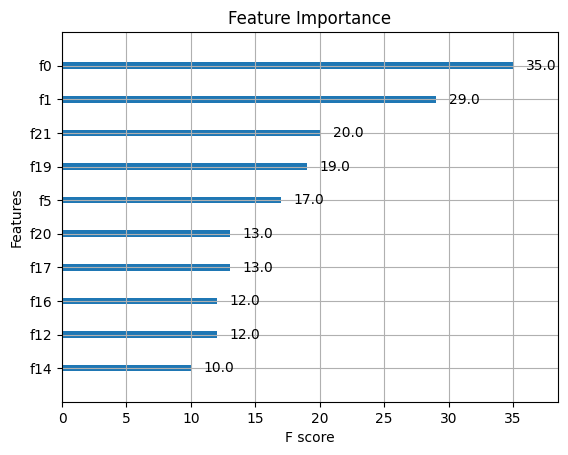

In [17]:
# Plot feature importance
plt.figure(figsize=(10, 8))
plot_importance(model, max_num_features=10, importance_type='weight')  # Plot top 10 important features
plt.title('Feature Importance')
plt.show()

The above graph shows the feature importance from the XGBoost model. Each feature on the y-axis (e.g., f0, f1, etc.) represents a specific attribute in the dataset. The x-axis, labeled "F score," indicates how many times a particular feature was used to split the data across all decision trees within the XGBoost model.

**Key insights:**

* Feature f0 and f1 are the most important features, as they were used the most frequently (F scores of 35 and 29, respectively). These features have the highest impact on the model’s decisions.
* Features f21, f19, and f5 also contribute significantly but to a lesser degree than f0 and f1.
* Features with lower F scores, such as f14 and f12, are still used but have less impact on the final model.

This graph helps identify which features in the dataset are critical for predicting whether a patient has Parkinson’s disease.

In this Python machine learning project, we learned to detect the presence of Parkinson’s Disease in individuals using various factors. We used an XGBClassifier for this and made use of the sklearn library to prepare the dataset. This gives us an accuracy of 94.87%, which is great considering the number of lines of code in this python project.